# EDA on Titanic Dataset

## Understanding attributes

- PassengerId: A unique identifier for each passenger
- Survived: Survival (0 = No, 1 = Yes) – target variable
- Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) indicating socio-economic status
- Name: Full name of the passenger
- Sex: Gender (male, female)
- Age: Age of the passenger (in years); may contain missing values
- SibSp: Number of siblings or spouses aboard the Titanic
- Parch: Number of parents or children aboard
- Ticket: Ticket number
- Fare: Passenger fare (British pounds)
- Cabin: Cabin number; many entries are missing
- Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
Challenges and Considerations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_titanic = pd.read_csv(r"C:\Users\mikun\Downloads\archive\Titanic-Dataset.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_titanic.shape # 891 rows and 12 columns

(891, 12)

In [4]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
len(df_titanic.columns)

12

In [6]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_titanic["Age"] = df_titanic.groupby(["Sex", "Pclass"])["Age"].transform(
    lambda x: x.fillna(x.median())
).astype(int)

In [10]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [11]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df_titanic["Embarked"].fillna(df_titanic["Embarked"].mode()[0], inplace=True)

In [13]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# Univariate Analysis

## Univariate Analysis with `Survived`

In [14]:
sns.set(style="darkgrid")

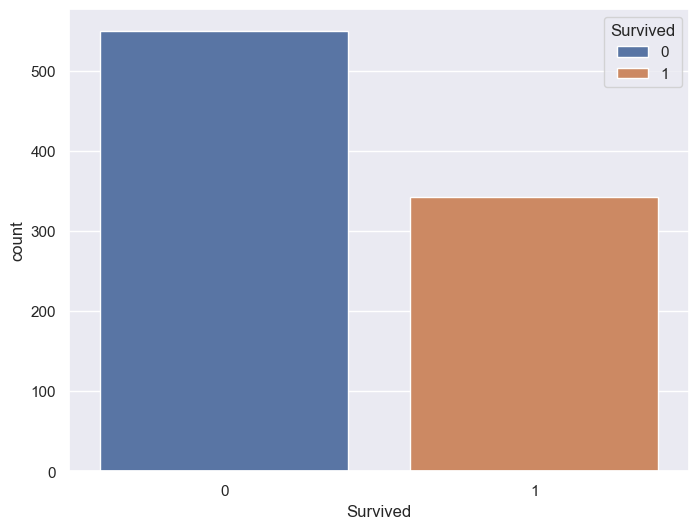

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df_titanic, x="Survived", hue="Survived")

0 = No, 1 = Yes

There is less survived than not survived

## Univariate Analysis with `Pclass`

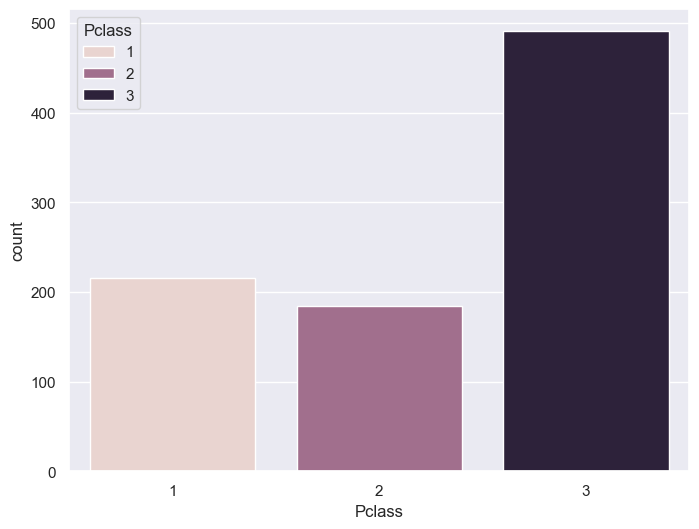

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df_titanic, x="Pclass", hue="Pclass")

There is more people in 3rd class ecnomy followed by 1st and then second

In [17]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Univariate Analysis with `Sex`

In [18]:
df_titanic["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

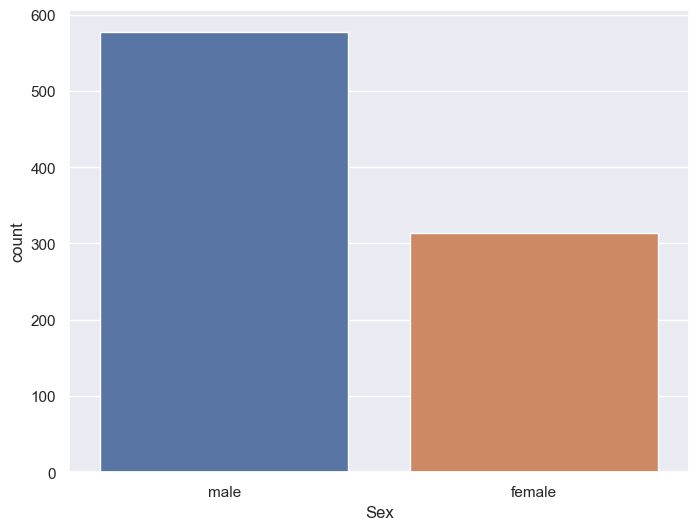

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data = df_titanic, x="Sex", hue="Sex")

There are more male than female in that ship

## Univariate Analysis with `Age`

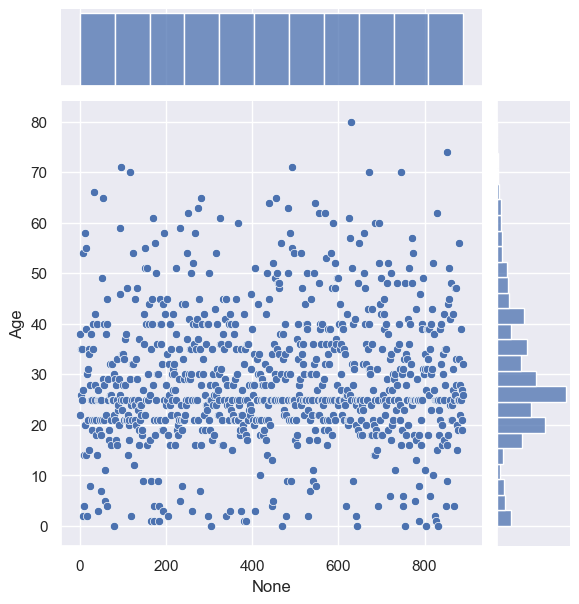

In [20]:
ax = sns.jointplot(data=df_titanic["Age"], kind="scatter")

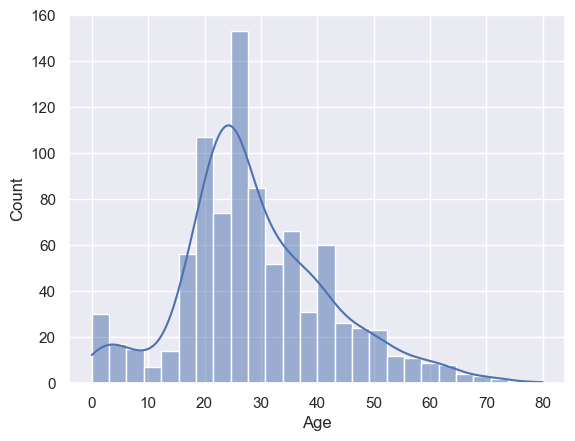

In [21]:
ax = sns.histplot(data=df_titanic["Age"], kde=True)

Below 40 and above 20 are mainly present in the dataset

In [22]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Univariate Analysis with `SibSp`

In [23]:
df_titanic["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

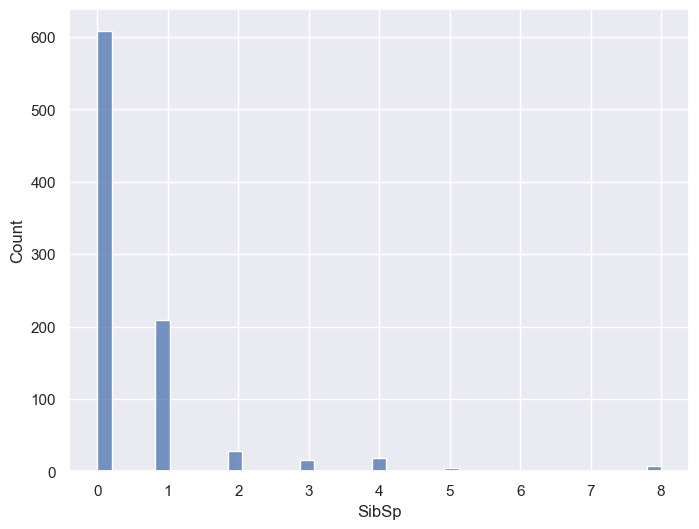

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.histplot(data=df_titanic["SibSp"])

Most passengers with 0 or 1 sibling or spouce

In [25]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Univariate Analysis with `Parch` (Parent or Child)

In [26]:
df_titanic.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

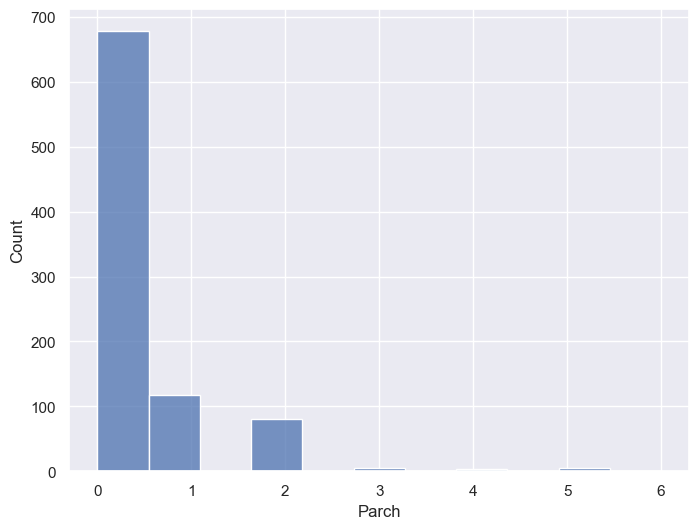

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax = sns.histplot(data=df_titanic["Parch"])

## Univariate Analysis with `Fare`

In [28]:
df_titanic["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

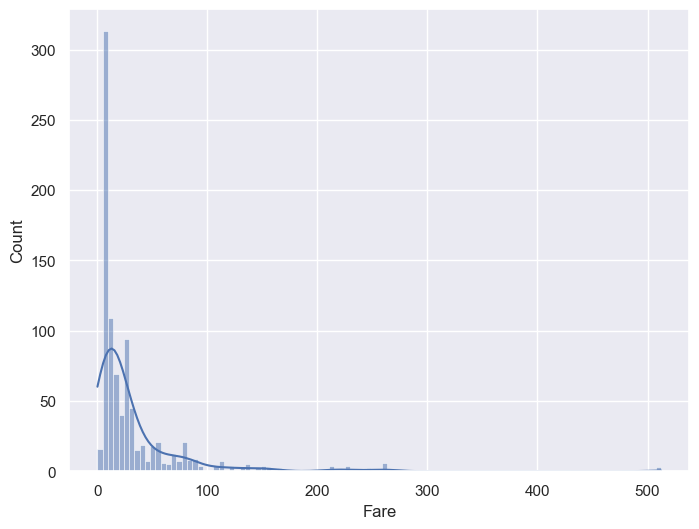

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(data=df_titanic["Fare"], kde=True)

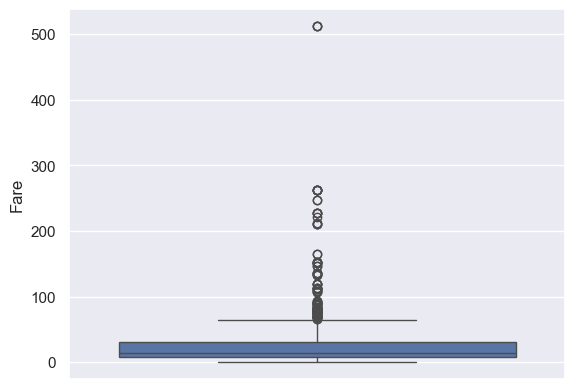

In [30]:
ax = sns.boxplot(data=df_titanic["Fare"])

## Univariate Analsysi with `Embarked`

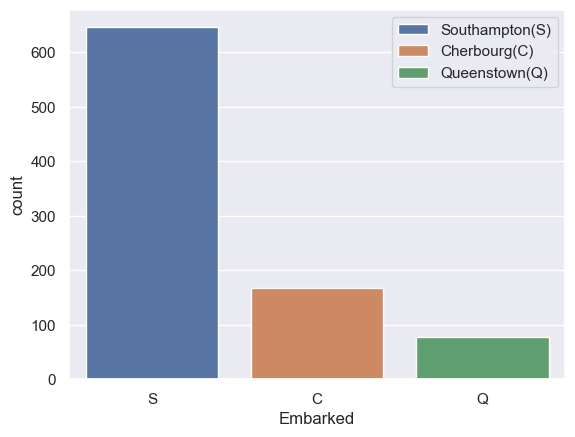

In [31]:
ax = sns.countplot(data=df_titanic, x = "Embarked", hue="Embarked")
plt.legend(["Southampton(S)", "Cherbourg(C)", "Queenstown(Q)"]);

In [32]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# Bivariate Analysis

## Bivariate Analysis between `Survived` and `Pclass`

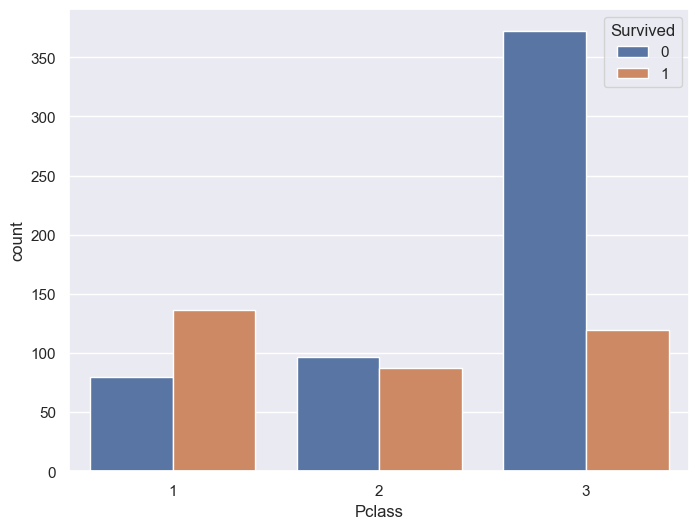

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df_titanic, x="Pclass", hue="Survived")

* Survival rate in first class is higher.
* And survival rate in second class is lowest.

## Bivariate Analysis between `Survived` and `Sex`

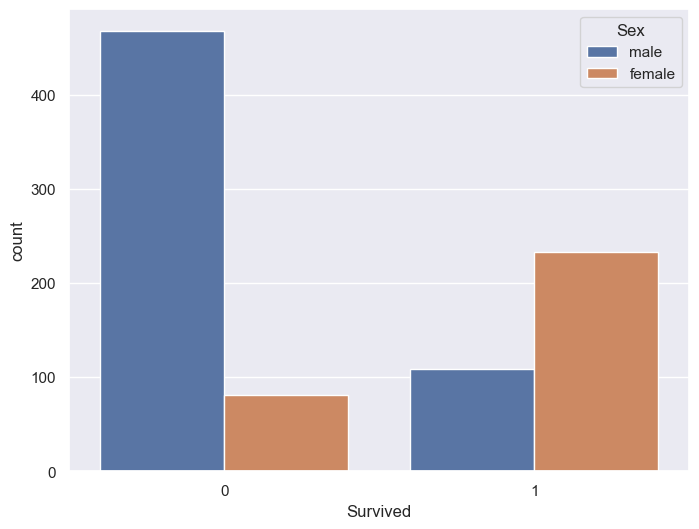

In [36]:
# Raw data
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data=df_titanic, x="Survived", hue="Sex")

Female Survival rate is more than male

In [41]:
# But to see in percentage
survival_rate = pd.crosstab(df_titanic["Sex"], df_titanic["Survived"], normalize=True) * 100
survival_rate

Survived,0,1
Sex,,
female,9.090909,26.150393
male,52.525253,12.233446


Text(0.5, 1.0, 'Survival percentage by sex')

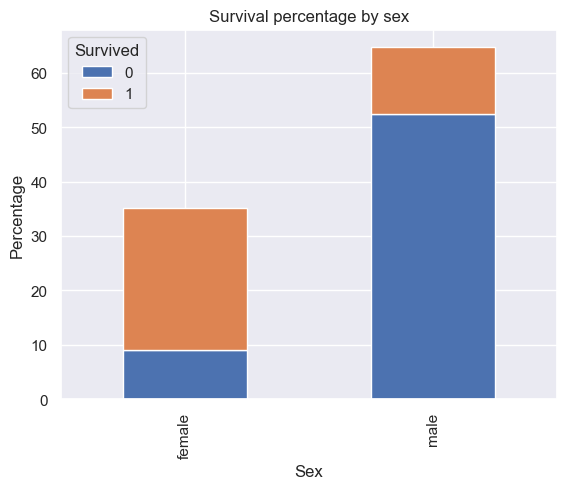

In [45]:
survival_rate.plot(kind="bar", stacked=True)
plt.ylabel("Percentage")
plt.title("Survival percentage by sex")

Text(0.5, 1.0, 'Average Survival rate by Sex')

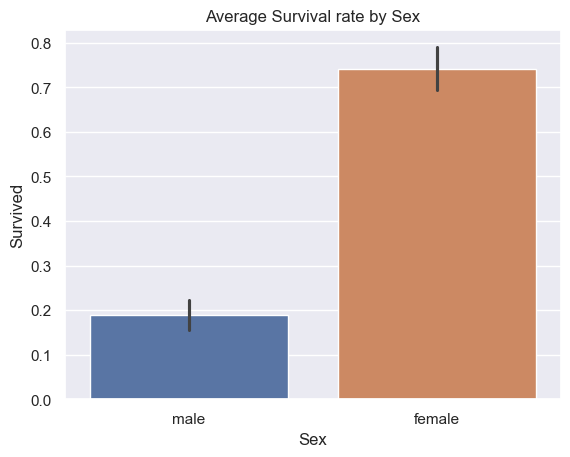

In [49]:
# or we can do this like
ax = sns.barplot(data=df_titanic, x="Sex", y="Survived", hue="Sex")
plt.title("Average Survival rate by Sex")

In [50]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Bivariate Analysis between `Survived` and `Age`

In [53]:
df_titanic[["Survived", "Age"]].describe()

,Survived,Age
count,891.000000,891.000000
mean,0.383838,29.072952
std,0.486592,13.326339
min,0.000000,0.000000
25%,0.000000,21.000000
50%,0.000000,26.000000
75%,1.000000,36.000000
max,1.000000,80.000000


Text(0.5, 1.0, 'Age distribution by survival')

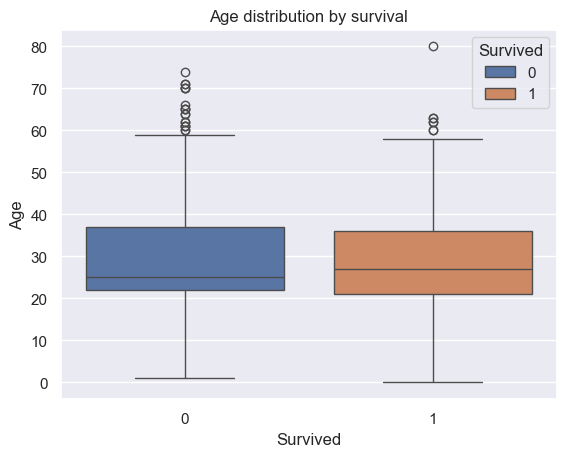

In [52]:
ax = sns.boxplot(data= df_titanic, x="Survived", y="Age", hue="Survived")
plt.title("Age distribution by survival")

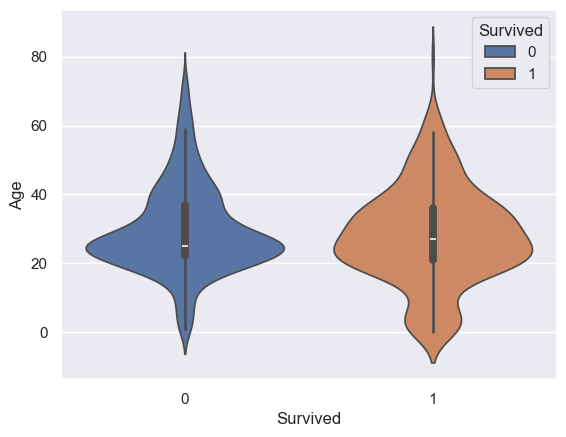

In [55]:
ax = sns.violinplot(data=df_titanic, x="Survived", y="Age", hue="Survived")


Mostly Younger one not survived

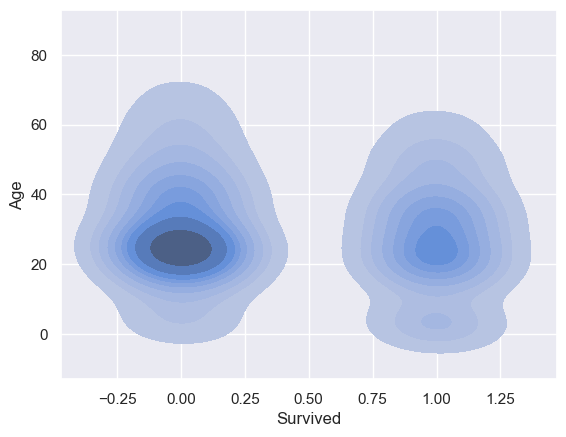

In [58]:
ax = sns.kdeplot(data=df_titanic, x="Survived", y="Age", fill=True)

Mostly young adults have not survived

In [59]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Bivariate Analysis between `Survived` and `Embarked`

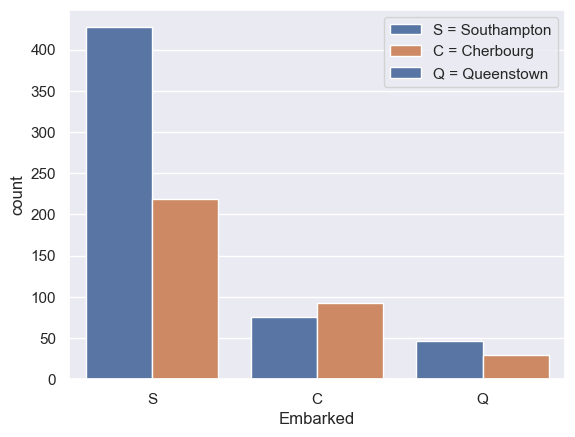

In [63]:
ax = sns.countplot(data=df_titanic, x="Embarked", hue="Survived")
plt.legend([ 'S = Southampton', 'C = Cherbourg', 'Q = Queenstown'])

In [64]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Bivariate Analysis between `Survived` and `Fare`

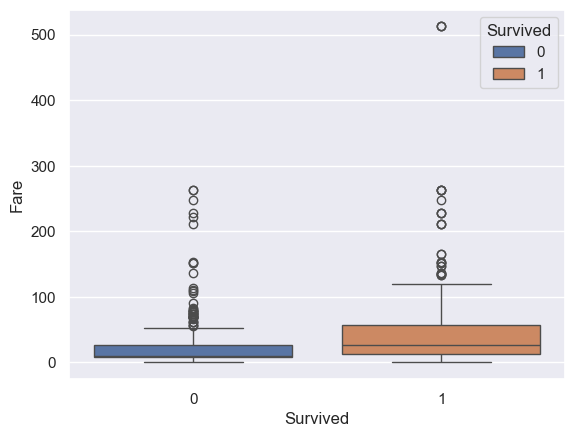

In [68]:
ax = sns.boxplot(data=df_titanic, x="Survived", y="Fare", hue="Survived")

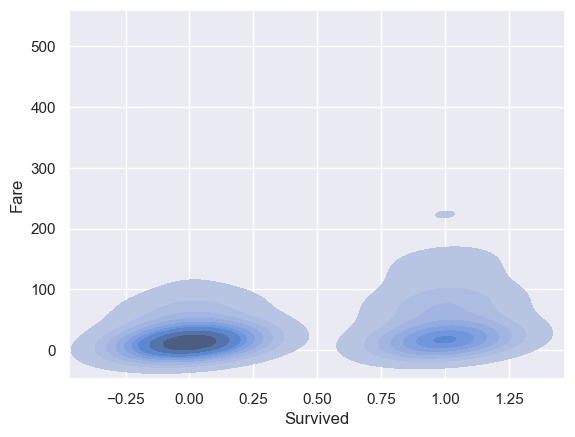

In [69]:
ax = sns.kdeplot(data=df_titanic, x="Survived", y="Fare", fill=True)

In [70]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Bivariate Analysis between `Pclass` and `Fare`

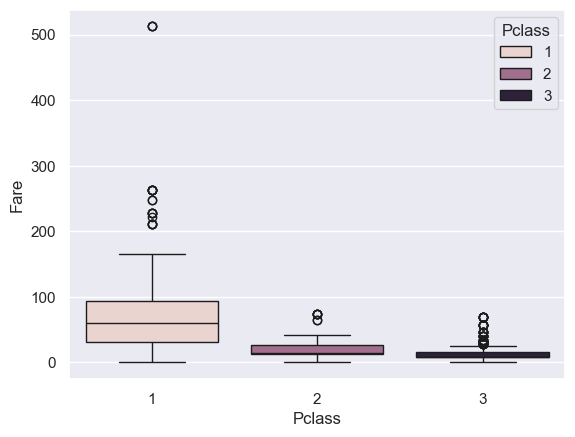

In [71]:
ax = sns.boxplot(data=df_titanic, x="Pclass", y="Fare", hue="Pclass")

## Bivariate Analysis between `Age` and `Fare`

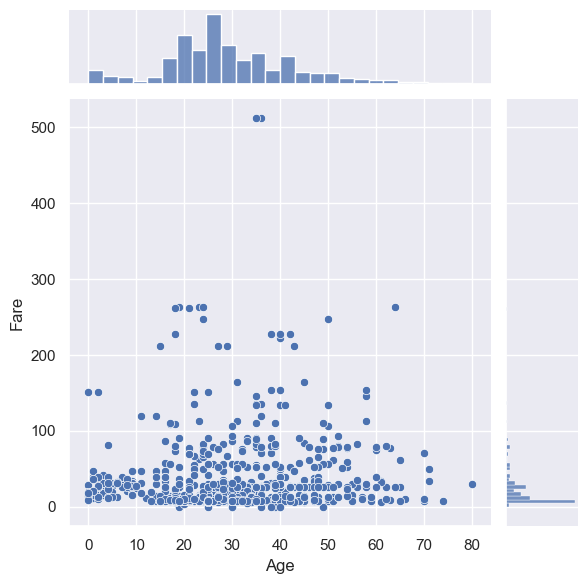

In [72]:
ax = sns.jointplot(data=df_titanic, x='Age', y='Fare', kind='scatter')

# Heat Map

In [74]:
df_titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039529,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.060291,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.414682,0.083081,0.018443,-0.549500
Age,0.039529,-0.060291,-0.414682,1.000000,-0.250248,-0.175708,0.123250
SibSp,-0.057527,-0.035322,0.083081,-0.250248,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175708,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.123250,0.159651,0.216225,1.000000


In [ ]:
sns.heatmap(data=df_titanic.corr(numeric_only=True), annot=True)